In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
# from tensorflow.keras.datasets import mnist

In [2]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
device

'cuda'

In [3]:
transform = transforms.ToTensor()

In [4]:
train_data = datasets.MNIST(root='/cnn_data',train=True,download=True,transform=transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size

train_dataset, val_dataset = random_split(train_data, [train_size, val_size])

In [7]:
print(f"Training Set Size: {len(train_dataset)}")
print(f"Validation Set Size: {len(val_dataset)}")

Training Set Size: 48000
Validation Set Size: 12000


In [8]:
test_data = datasets.MNIST(root='/cnn_data',train=False,download=True,transform=transform)

In [9]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [18]:
import os
# Path to store the dataset
root_dir = '/cnn_data'

# Print the absolute path to see where it is stored
absolute_path = os.path.abspath(root_dir)
print(f"MNIST data will be stored in: {absolute_path}")

MNIST data will be stored in: d:\cnn_data


In [10]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [23]:
train_loader

In [10]:
conv1 = nn.Conv2d(1,6,3,1)
conv2 = nn.Conv2d(6,16,3,1)

In [57]:
#grabbing the 1st MNIST image
for i, (X_train, y_train) in enumerate(train_data):
    break

In [58]:
X_train.shape

torch.Size([1, 28, 28])

In [32]:
y_train

5

In [59]:
x = X_train.reshape(1,1,28,28)
x.shape

torch.Size([1, 1, 28, 28])

In [60]:
x = F.relu(conv1(x))
x.shape
#1 - number of image, 6-number of feature maps, 26 by 26 is the reduced dimension due to convolution

torch.Size([1, 6, 26, 26])

In [61]:
#now pass through the pooling layer
x = F.max_pool2d(x,2,2)

In [62]:
x.shape

torch.Size([1, 6, 13, 13])

In [66]:
#2nd convolutional layer
x = F.relu(conv2(x))
x.shape

torch.Size([1, 16, 11, 11])

In [67]:
x = F.max_pool2d(x,2,2)
x.shape

torch.Size([1, 16, 5, 5])

## Now defining the model for the entire dataset

In [11]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1) #1 input at a time, 6 number of kernals of size 3X3 with stride of 1
        self.conv2 = nn.Conv2d(6,16,3,1) #the output from 1st kernel (feature maps) will be input, 16 more feature maps will be generated, 3X3 kernel size with stride 1
        self.fc1 = nn.Linear( 5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2,2)

        x = x.view(-1,16*5*5)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # x = F.softmax(self.fc3(x))
        x = self.fc3(x)

        return F.log_softmax(x, dim=1)



In [12]:
#create an instance of the model

torch.manual_seed(41)
model = ConvolutionalNetwork()

model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [13]:
model.to(device)

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [14]:
#loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [18]:
for b, (x, y) in enumerate(train_loader):
    print(b,x,y)
    break

0 tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 

In [19]:
y

tensor([6, 3, 0, 8, 5, 9, 5, 9, 5, 8])

In [15]:
import time
start_time = time.time()

epochs = 10
train_correct = []
val_correct = []
train_losses = []
val_losses = []

for epoch in range(epochs):
    trn_corr = 0
    val_corr = 0
    running_train_loss = 0.0
    running_val_loss = 0.0

    model.train()

    for b, (X_train, y_train) in enumerate(train_loader):
        X_train, y_train = X_train.to(device), y_train.to(device)
        # b += 1
        y_pred = model(X_train)
        train_loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum().item()
        trn_corr += batch_corr

        #updating the parameters
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        running_train_loss += train_loss.item()

        if (b+1)%600 == 0:
            print(f"Epoch: {epoch + 1} Batch: {b + 1} Loss:{train_loss.item():.4f}")
    
    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_correct.append(trn_corr)
    
    model.eval()
    with torch.no_grad():
        for b, (X_val, y_val) in enumerate(val_loader):
            X_val, y_val = X_val.to(device), y_val.to(device)
            y_val_pred = model(X_val)

            predicted = torch.max(y_val_pred.data, 1)[1]
            val_corr += (predicted == y_val).sum().item()

            val_loss = criterion(y_val_pred, y_val)
            running_val_loss += val_loss.item()
        
    avg_val_loss = running_val_loss / len(val_loader)    
    val_losses.append(avg_val_loss)
    val_correct.append(val_corr)



current_time = time.time()
total_time = current_time - start_time
print(f"Training took: {total_time/60} minutes")

Epoch: 1 Batch: 600 Loss:0.1033
Epoch: 2 Batch: 600 Loss:0.0769
Epoch: 3 Batch: 600 Loss:0.0558
Epoch: 4 Batch: 600 Loss:0.0294
Epoch: 5 Batch: 600 Loss:0.0423
Epoch: 6 Batch: 600 Loss:0.1038
Epoch: 7 Batch: 600 Loss:0.0437
Epoch: 8 Batch: 600 Loss:0.0646
Epoch: 9 Batch: 600 Loss:0.0069
Epoch: 10 Batch: 600 Loss:0.0059
Training took: 1.6952876011530558 minutes


In [16]:
train_correct

[41857, 46361, 46859, 47108, 47252, 47374, 47462, 47525, 47600, 47624]

In [19]:
train_accuracy = [t/len(train_loader.dataset)*100 for t in train_correct]
avg_train_accuracy = sum(train_accuracy) / len(train_accuracy)
avg_train_accuracy

97.29625000000001

In [17]:
val_correct

[11472, 11687, 11735, 11745, 11782, 11827, 11751, 11854, 11828, 11848]

In [20]:
val_accuracy = [t/len(val_loader.dataset)*100 for t in val_correct]
avg_val_accuracy = sum(val_accuracy) / len(val_accuracy)
avg_val_accuracy

97.94083333333333

## Visualizing the results

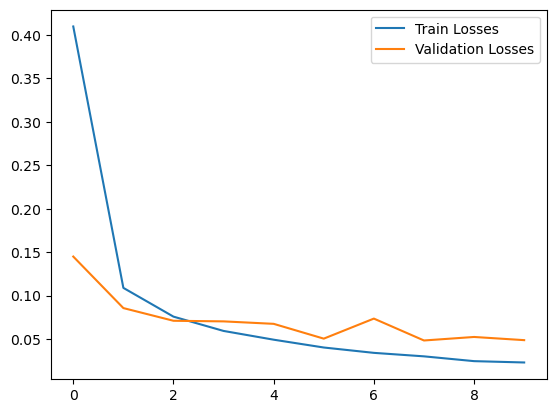

In [18]:
# train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label='Train Losses')
plt.plot(val_losses, label='Validation Losses')
plt.legend()
plt.show()

In [21]:
len(train_loader.dataset)

60000

## Now testing

In [24]:
model.eval()
test_correct = 0
test_running_loss = 0.0

with torch.no_grad():
    for X_test, y_test in test_loader:
        X_test, y_test = X_test.to(device), y_test.to(device)

        y_test_pred = model(X_test)

        test_loss = criterion(y_test_pred, y_test)
        test_running_loss += test_loss.item()

        predicted = torch.max(y_test_pred, 1)[1]
        test_correct += (predicted == y_test).sum().item()

avg_test_loss = test_running_loss / len(test_loader)

test_accuracy = test_correct / len(test_loader.dataset) * 100

print(f"Average test loss: {avg_test_loss:.4f}")
print(f"Test accuracy : {test_accuracy:.4f}%")

Average test loss: 0.0308
Test accuracy : 99.1000%


In [23]:
len(test_loader)

157

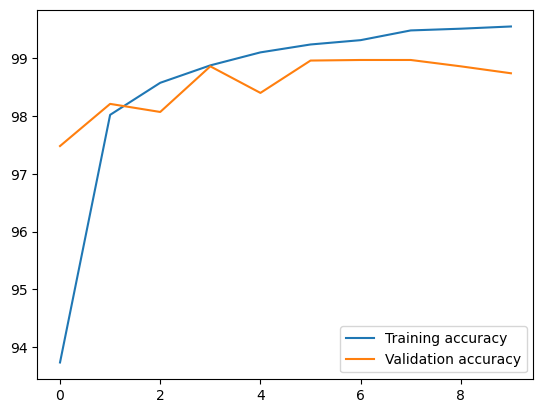

In [20]:

plt.plot([t / len(train_loader.dataset) * 100 for t in train_correct], label='Training accuracy')
plt.plot([t / len(test_loader.dataset)*100 for t in test_correct], label='Validation accuracy')
plt.legend()
plt.show()

In [25]:
torch.save(model, 'mnist_cnn.pth')